In [1]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import *

## Load bike share data

In [2]:
bsdata = pd.read_csv('C:/Users/U783567/Documents/workshop/BikeSharing.csv')

In [3]:
from piml import Experiment
exp = Experiment()

In [4]:
exp.data_loader(data=bsdata)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,61.0


In [5]:
exp.data_summary( feature_exclude=['yr','holiday'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(17379, 13)')

In [6]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [8]:
exp.data_prepare(target='cnt', task_type='Regression', test_ratio=0.4, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,0,1
0,Excluded columns,"[yr, holiday]"
1,Target variable,cnt
2,Sample weight,None
3,Task type,Regression
4,Split method,Random
5,Test ratio,0.4
6,Random state,0


In [9]:
exp.feature_select()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Please run data_prepare first.</p>")

## Train 3 models and compare

In [10]:
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [11]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Try to understand what GAM explains and what it fails to capture

In [10]:
exp.model_explain(model='GAM', show='global', uni_feature = 'hr', bi_features = ['hr','temp'],figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Identify covariates responsible for worst mse

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

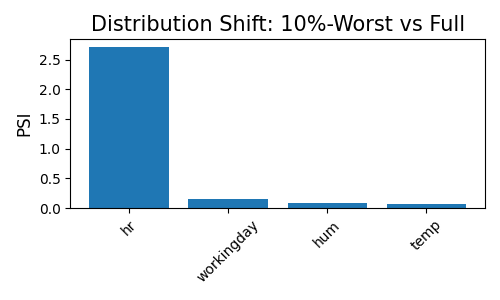

In [11]:
exp.model_diagnose(model='GAM',show='resilience_psi',figsize = (5,3))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

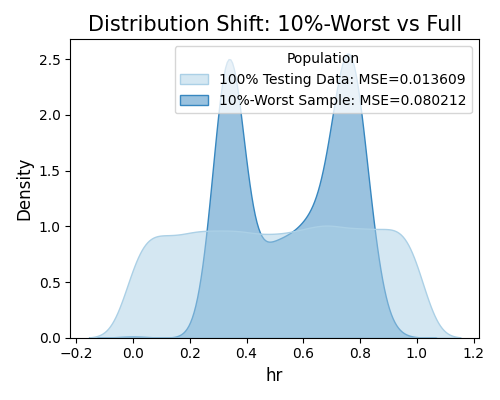

In [12]:
exp.model_diagnose(model='GAM',show='resilience_shift_density',target_feature = 'hr',figsize = (5,4))

### Weakness detection using super-vised partitioning on test MSE

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

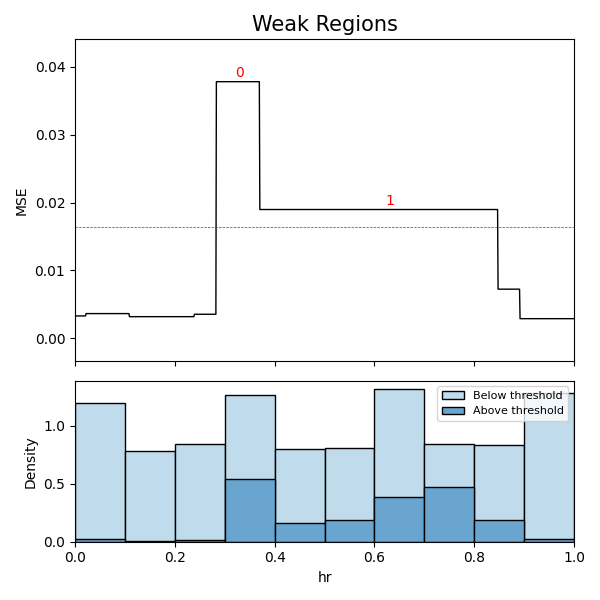

In [14]:
exp.model_diagnose(model='GAM', show='weakspot_plot', slice_features=['hr'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6), use_test = True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

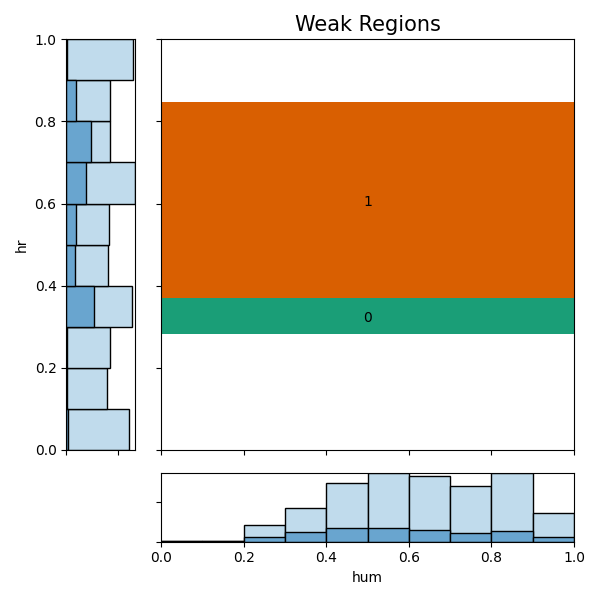

In [15]:
exp.model_diagnose(model='GAM', show='weakspot_plot', slice_features=['hum','hr'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6), use_test = True)

In [16]:
exp.model_diagnose(model='GAM', show='weakspot_result', slice_features=['hr', 'hum'], 
                   slice_method='tree', threshold=1.2, min_sample=20,use_test = True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Weak Regions cut-off at MSE: 0.01633


,[hr,hr),[hum,hum),#Test,#Train,test_MSE,train_MSE,Gap
0,0.2826,0.3696,0.0,1.0,582,872,0.0378,0.0375,0.0003
1,0.3696,0.8478,0.0,1.0,3232,4780,0.0190,0.0192,-0.0003


## confirm results using conformal prediction

In [11]:
exp.model_diagnose(model='GAM', show='reliability', alpha=0.9, 
                   target_feature='hr', threshold=1.2, bins=10)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Global weakness detection using residuals

In [12]:
pipeline = exp.get_model("GAM")
test_x, test_y, test_sample_weight = exp.get_data(test=True)
test_pred = pipeline.predict(test_x)
test_pred = test_pred.reshape(6952,1)
test_res = test_y - test_pred

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [13]:
test_res.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

(6952, 1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Text(0.5, 0, 'residual')

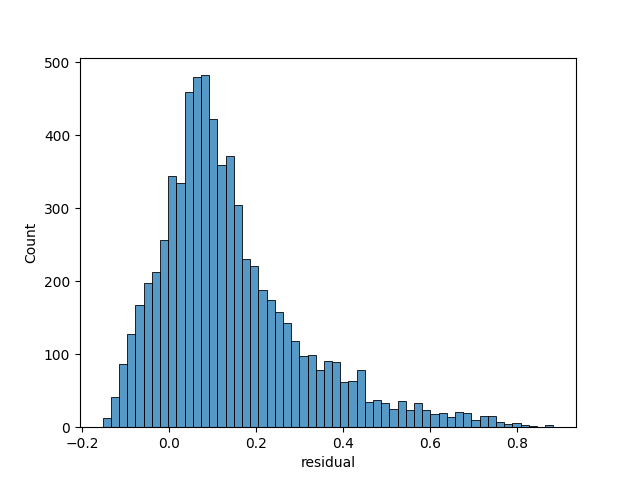

In [14]:
import matplotlib.pyplot as plt
plt.figure()
ax = sns.histplot(x = test_res[:,0])
ax.set_xlabel('residual')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<Figure size 640x480 with 0 Axes>

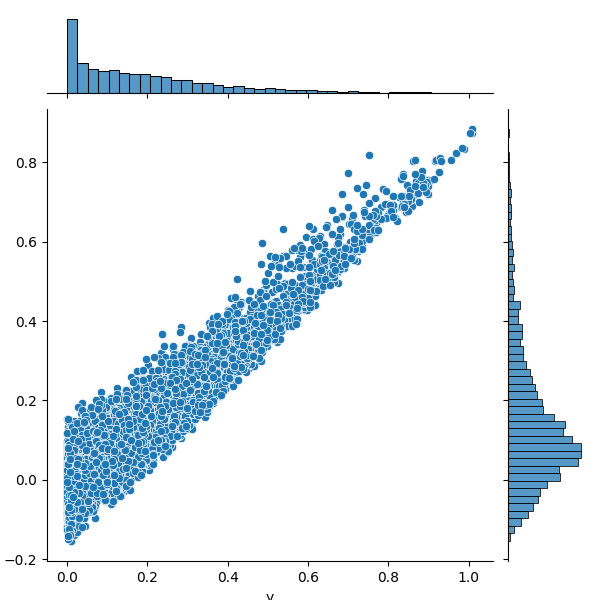

In [15]:
plt.figure()
ax = sns.jointplot(x = test_y[:,0],y =test_res[:,0] )
ax.set_axis_labels('y','res')

In [16]:
test_x_res = test_x.copy()
test_x_res = np.hstack((test_x_res,test_res))
test_x_res = pd.DataFrame(test_x_res, columns = [ 'hr',  'workingday',  'temp',  'hum','res'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [17]:
test_x_res.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

(6952, 5)

In [22]:
test_x_res.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,hr,workingday,temp,hum,res
0,0.217391,0.0,0.551020,0.88,-0.044536
1,0.173913,1.0,0.428571,0.88,-0.000082
2,0.826087,1.0,0.428571,0.51,0.710887
3,0.478261,0.0,0.244898,0.48,0.221147
4,0.913043,1.0,0.653061,0.50,0.222300


## load test data with residuals

In [18]:
expr = Experiment()
expr.data_loader(test_x_res)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,hr,workingday,temp,hum,res
0,0.217391,0.0,0.551020,0.88,-0.044536
1,0.173913,1.0,0.428571,0.88,-0.000082
2,0.826087,1.0,0.428571,0.51,0.710887
3,0.478261,0.0,0.244898,0.48,0.221147
4,0.913043,1.0,0.653061,0.50,0.222300
...,...,...,...,...,...
6947,1.000000,0.0,0.489796,0.39,-0.052540
6948,0.217391,0.0,0.224490,0.75,0.051746
6949,0.086957,0.0,0.612245,0.57,-0.035485
6950,0.695652,1.0,0.387755,0.76,0.140868


In [19]:
expr.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [20]:
expr.data_prepare(target='res', task_type='Regression', test_ratio=0.1, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,0,1
0,Excluded columns,[]
1,Target variable,res
2,Sample weight,None
3,Task type,Regression
4,Split method,Random
5,Test ratio,0.1
6,Random state,0


In [21]:
model =  XGBRegressor(max_depth = 6, learning_rate = 0.05,n_estimators = 300)
expr.model_train(model = model, name = 'XGB')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register XGB Done</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

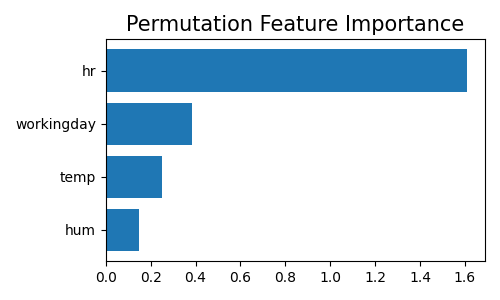

In [22]:
expr.model_explain(model = 'XGB',show = 'global_pfi',figsize = (5,3))

In [ ]:
##working day turns out important - due to interaction

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

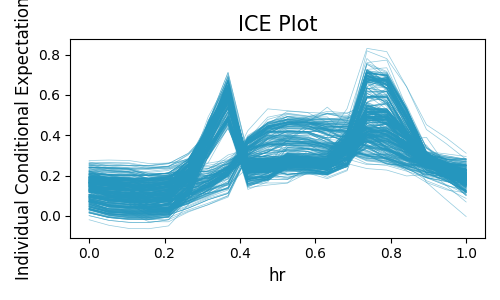

In [23]:
expr.model_explain(model = 'XGB',show = 'global_ice', uni_feature = 'hr',figsize = (5,3))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

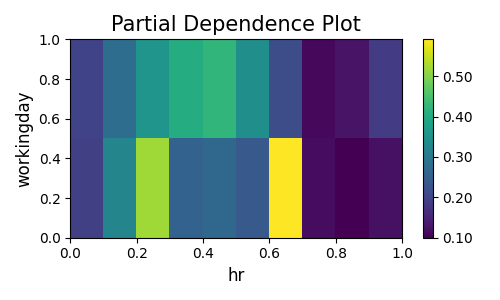

In [24]:
expr.model_explain(model = 'XGB',show = 'global_pdp', bi_features = ['hr','workingday'],figsize = (5,3))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

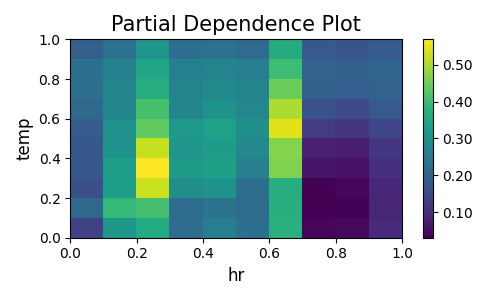

In [25]:
expr.model_explain(model = 'XGB',show = 'global_pdp', bi_features = ['hr','temp'],figsize = (5,3))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

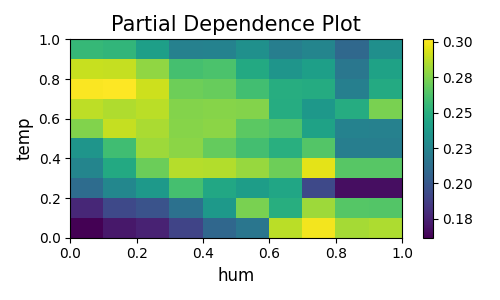

In [139]:
expr.model_explain(model = 'XGB',show = 'global_pdp', bi_features = ['hum','temp'],figsize = (5,3))